In [352]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cleanedtest/test_cleaned.csv
/kaggle/input/cleaneddata/cleaned.csv


# Import libraries and Data Loading 🤖

In [353]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

#Neural Network
from sklearn.neural_network import MLPClassifier


#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Naive bayes
from sklearn.naive_bayes import GaussianNB 

#Stacking
from mlxtend.classifier import StackingClassifier

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

#reading in CSV's from a file path
train_df = pd.read_csv('../input/cleaneddata/cleaned.csv')
test_df = pd.read_csv('../input/cleanedtest/test_cleaned.csv')

#Pandas: whats the data row count?
print(train_df.shape)
    
#Pandas: whats the distribution of the data?
print(train_df.describe())
    
#Pandas: What types of data do i have?
print(train_df.info())

cleaneddata
cleanedtest

(55058, 18)
                 V1            V2            V3            V4            V5  \
count  55058.000000  55058.000000  55058.000000  55058.000000  55058.000000   
mean       0.573286  10027.907806      1.439954      1.669512      3.737023   
std        0.494604     73.491892      0.762256      0.794189      0.784929   
min        0.000000  10001.000000      1.000000      1.000000      1.000000   
25%        0.000000  10002.000000      1.000000      1.000000      4.000000   
50%        1.000000  10005.000000      1.000000      1.000000      4.000000   
75%        1.000000  10014.000000      2.000000      2.000000      4.000000   
max        1.000000  10722.000000      3.000000      3.000000      4.000000   

                 V6            V8            V9           V11            V12  \
count  5.505800e+04  55058.000000  55058.000000  55058.000000   55058.000000   
mean   5.816138e+03      0.702822      0.649152      4.125940     362.943487   
std    1.91

In [354]:
train_df.isnull().sum().max()


0

In [355]:
test_df.isnull().sum().max()


13765

## What do summary statistics look like? 👁 👁

In [356]:
train_df.describe


<bound method NDFrame.describe of        V1     V2  V3  V4  V5       V6    V7  V8  V9   V10  V11    V12     V13  \
0       1  10003   1   3   4   4200.0  B004   1   1  S133    3    0.0   69000   
1       1  10005   1   1   4  12000.0  B009   0   1  S133    3    0.0  180000   
2       1  10001   1   3   4   4000.0  B002   1   1  S133    3    0.0   61000   
3       1  10097   3   3   4   3000.0  B003   0   1  S133    2    0.0   60000   
4       0  10001   1   1   4   4000.0  B002   1   0  S133    2    0.0   40000   
...    ..    ...  ..  ..  ..      ...   ...  ..  ..   ...  ...    ...     ...   
55053   1  10002   1   1   4   6850.0  B001   1   1  S122    7    0.0   50000   
55054   1  10001   1   2   4   3400.0  B004   1   1  S122    7  761.8   20000   
55055   1  10005   1   3   4   4500.0  B002   1   1  S122    7    0.0   81000   
55056   0  10037   2   1   4    500.0  B008   0   0  S122    7  200.0   40000   
55057   0  10010   1   2   4   1550.0  B001   1   0  S122    7    0.0   400

In [357]:
train_df['age_range'] = pd.cut(train_df['V17'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

In [358]:
#test_df['age_range'] = pd.cut(test_df['V17'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

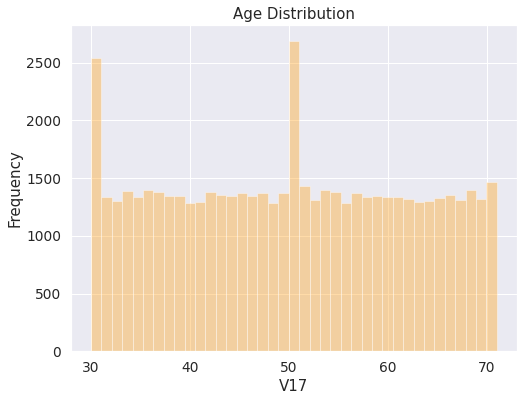

In [359]:
fig,ax = plt.subplots(figsize=(8, 6))
sns.distplot(train_df['V17'].dropna(),ax=ax, kde=False, color='#ffa726')
plt.title('Age Distribution')
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

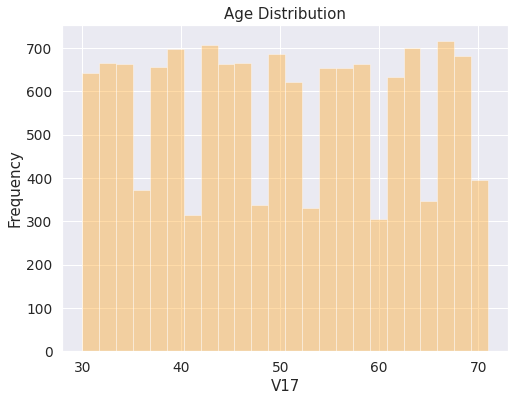

In [360]:
fig,ax = plt.subplots(figsize=(8, 6))
sns.distplot(test_df['V17'].dropna(),ax=ax, kde=False, color='#ffa726')
plt.title('Age Distribution')
plt.ylabel("Frequency")

Text(0.5, 1.0, 'Age Group vs Loan approval')

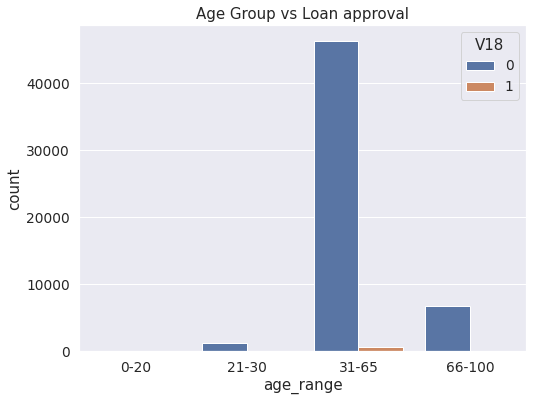

In [361]:
fig,ax = plt.subplots(figsize=(8, 6))
sns.countplot(data = train_df, x = 'age_range', hue='V18')
plt.title('Age Group vs Loan approval')

In [362]:
orig_loan_dataset = train_df.copy()

def understand_variables(dataset):
    print("Type = " +str(type(dataset))+"\n")
    print("Shape = "+str(dataset.shape)+"\n")
    print("Head : \n\n"+str(dataset.head())+"\n\n")
    print(str(dataset.info())+"\n\n")
    print("No.of unique values :\n\n"+str(dataset.nunique(axis=0))+"\n\n")
    print("Description :\n\n"+str(dataset.describe())+"\n\n")
    
    #print(dataset.describe(exclude=[np.number]))
    #Since no categorical variables, no need to have the above line
    
    print("Null count :\n\n"+str(dataset.isnull().sum()))
    
understand_variables(train_df)

Type = <class 'pandas.core.frame.DataFrame'>

Shape = (55058, 19)

Head : 

   V1     V2  V3  V4  V5       V6    V7  V8  V9   V10  V11  V12     V13  V14  \
0   1  10003   1   3   4   4200.0  B004   1   1  S133    3  0.0   69000    5   
1   1  10005   1   1   4  12000.0  B009   0   1  S133    3  0.0  180000    5   
2   1  10001   1   3   4   4000.0  B002   1   1  S133    3  0.0   61000    4   
3   1  10097   3   3   4   3000.0  B003   0   1  S133    2  0.0   60000    5   
4   0  10001   1   1   4   4000.0  B002   1   0  S133    2  0.0   40000    4   

     V15   V16  V17  V18 age_range  
0  14.85  1636   57    0     31-65  
1  14.85  4268   44    0     31-65  
2  14.85  1693   57    0     31-65  
3  13.99  1396   31    0     31-65  
4  19.18  1103   52    0     31-65  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55058 entries, 0 to 55057
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   V1         55058 non-nu

# Encoding Data 😎

In [363]:
labelDict = {}
for feature in train_df:
    le = preprocessing.LabelEncoder()
    le.fit(train_df[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    train_df[feature] = le.transform(train_df[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
for key, value in labelDict.items():     
    print(key, value)


label_V1 [0, 1]
label_V2 [10001, 10002, 10003, 10004, 10005, 10006, 10007, 10008, 10009, 10010, 10011, 10012, 10013, 10014, 10015, 10016, 10017, 10018, 10019, 10020, 10021, 10022, 10023, 10024, 10025, 10026, 10027, 10028, 10029, 10030, 10031, 10032, 10033, 10034, 10035, 10036, 10037, 10038, 10039, 10040, 10041, 10042, 10043, 10044, 10045, 10046, 10047, 10048, 10049, 10050, 10051, 10052, 10053, 10054, 10055, 10056, 10057, 10058, 10059, 10060, 10061, 10062, 10063, 10064, 10065, 10066, 10067, 10068, 10069, 10070, 10071, 10072, 10073, 10074, 10075, 10076, 10077, 10078, 10079, 10080, 10081, 10082, 10083, 10084, 10085, 10086, 10087, 10088, 10089, 10090, 10091, 10092, 10093, 10094, 10095, 10096, 10097, 10098, 10099, 10100, 10101, 10102, 10103, 10104, 10105, 10106, 10107, 10108, 10109, 10110, 10111, 10112, 10113, 10114, 10115, 10116, 10117, 10118, 10119, 10120, 10121, 10122, 10123, 10124, 10125, 10126, 10127, 10128, 10129, 10130, 10131, 10132, 10133, 10134, 10135, 10136, 10137, 10138, 10139, 1

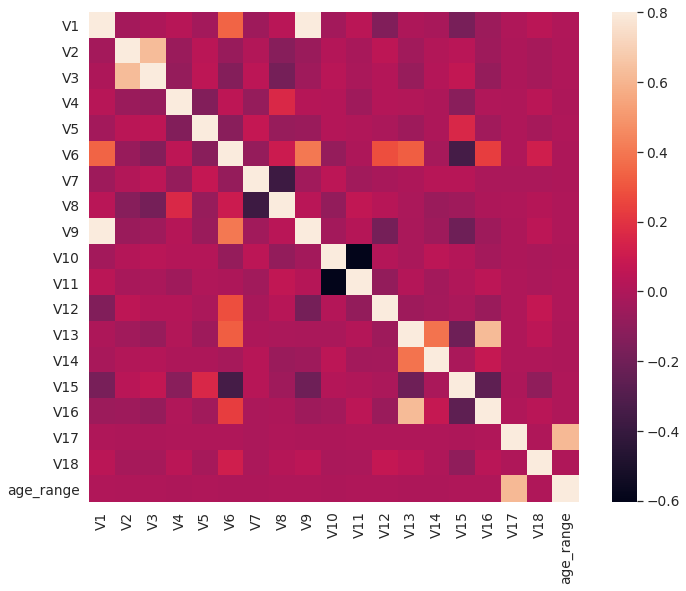

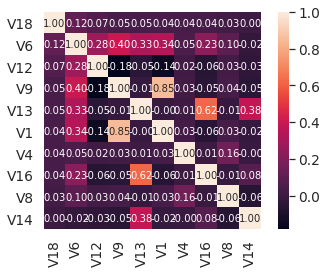

In [364]:
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()
#TREATMENT HEATMAT
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'V18')['V18'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Scaling 👾

In [365]:
scaler = MinMaxScaler()
train_df['V17'] = scaler.fit_transform(train_df[['V17']])
train_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,age_range
0,1,2,0,2,3,3383,3,1,1,6,2,0,64,4,16,1185,0.658537,0,1
1,1,4,0,0,3,3955,8,0,1,6,2,0,161,4,16,1963,0.341463,0,1
2,1,0,0,2,3,3315,1,1,1,6,2,0,56,3,16,1219,0.658537,0,1
3,1,96,2,2,3,2829,2,0,1,6,1,0,55,4,7,1009,0.024390,0,1
4,0,0,0,0,3,3315,1,1,0,6,1,0,35,3,47,757,0.536585,0,1


# Train Test Split 🖖

In [366]:
feature_cols = ['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17' ]
X = train_df[feature_cols]
y = train_df.V18
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=0)

# Creating a XGB model for Feature Importance 👊

In [367]:
import xgboost as xgb

clf_xgBoost = xgb.XGBClassifier(
    max_depth = 4,
    subsample = 0.8,
    colsample_bytree = 0.7,
    colsample_bylevel = 0.7,
    scale_pos_weight = 9,
    min_child_weight = 0,
    reg_alpha = 4,
    n_jobs = 4, 
    objective = 'binary:logistic'
)
# Fit the models
clf_xgBoost.fit(X, y)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:27:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=0, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=4, reg_lambda=1, scale_pos_weight=9, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:>

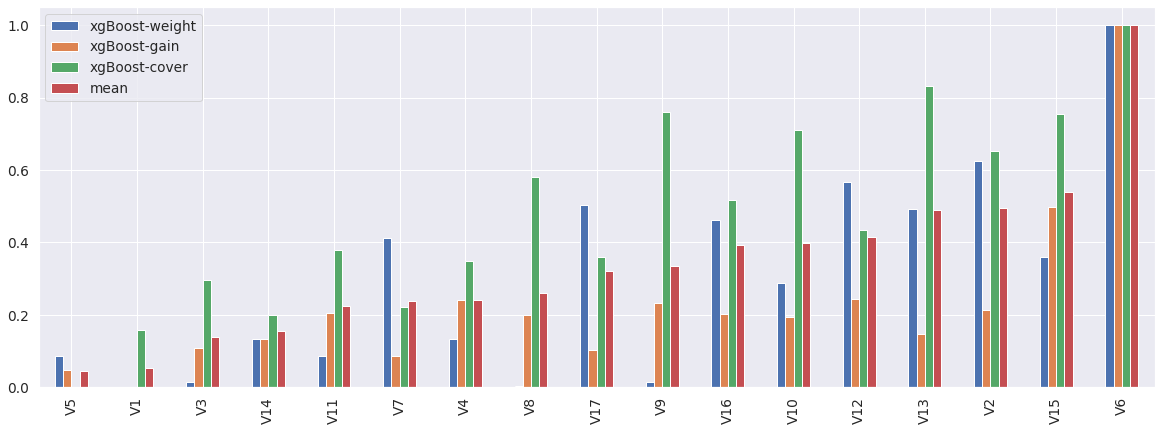

In [368]:
from sklearn import preprocessing

# Get xgBoost importances
importance_dict = {}
for import_type in ['weight', 'gain', 'cover']:
    importance_dict['xgBoost-'+import_type] = clf_xgBoost.get_booster().get_score(importance_type=import_type)
    
# MinMax scale all importances
importance_df = pd.DataFrame(importance_dict).fillna(0)
importance_df = pd.DataFrame(
    preprocessing.MinMaxScaler().fit_transform(importance_df),
    columns=importance_df.columns,
    index=importance_df.index
)

# Create mean column
importance_df['mean'] = importance_df.mean(axis=1)

# Plot the feature importances
importance_df.sort_values('mean').plot(kind='bar', figsize=(20, 7))

# Logistic Regression on Imbalanced Dataset 🤯

In [369]:
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
 
# Predict on training set
lr_pred = lr.predict(X_test)

In [370]:
accuracy_score(y_test, lr_pred)


0.9863179561690277

In [371]:
predictions = pd.DataFrame(lr_pred)
predictions[0].value_counts()

0    16518
Name: 0, dtype: int64

In [372]:
from sklearn.metrics import *

In [373]:
f1_score(y_test, lr_pred)

0.0

# Random Forest on Imbalanced Dataset 🤯

In [374]:
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)

accuracy_score(y_test, rfc_pred)

0.9862574161520765

In [375]:
f1_score(y_test, rfc_pred)


0.0

In [376]:
pd.DataFrame(confusion_matrix(y_test, rfc_pred))


,0,1
0,16291,1
1,226,0


# Trying out SMOTE 🤓(More Here: [SMOTE](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)) 

In [377]:
from imblearn.over_sampling import SMOTE

# Separate input features and target
y = train_df.V18
X = train_df.drop('V18', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27)
X_train, y_train = sm.fit_sample(X_train, y_train)

## Application of SMOTE technique with Logistic Regression 🥱


In [378]:
smote = LogisticRegression(solver='liblinear').fit(X_train, y_train)

smote_pred = smote.predict(X_test)

# Checking accuracy
accuracy_score(y_test, smote_pred)

0.7529967308390846

In [379]:
f1_score(y_test, smote_pred)

0.07205240174672489

In [380]:
pd.DataFrame(confusion_matrix(y_test, smote_pred))


,0,1
0,10233,3322
1,78,132


In [381]:
recall_score(y_test, smote_pred)


0.6285714285714286

In [382]:
from sklearn.utils import resample


# Decision Tree on Imbalanced Dataset 🤯

In [383]:
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,roc_curve,confusion_matrix,log_loss,precision_score,recall_score,auc
dectree=DecisionTreeClassifier().fit(X_train,y_train)
dec_pred=dectree.predict(X_test)
print("Accuracy score of Decision Tree Classifier on Imbalanced Data:",accuracy_score(y_test,dec_pred))
print(classification_report(y_test,dec_pred))
confusion_matrix(y_test,dec_pred)

Accuracy score of Decision Tree Classifier on Imbalanced Data: 0.9473301852524518
              precision    recall  f1-score   support

           0       0.99      0.96      0.97     13555
           1       0.04      0.11      0.06       210

    accuracy                           0.95     13765
   macro avg       0.51      0.53      0.52     13765
weighted avg       0.97      0.95      0.96     13765



array([[13017,   538],
       [  187,    23]])

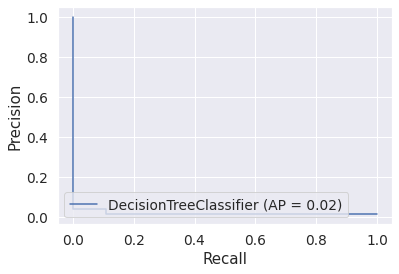

In [384]:
plot_precision_recall_curve(dectree,X_test,y_test)


# Application of DOWN-SAMPLING technique with Logistic Regression 😴

In [385]:
data_majority = train_df[train_df.V18==0]
data_minority = train_df[train_df.V18==1]
 
# Upsample minority class
data_major_downsampled = resample(data_majority, 
                                 replace=True, 
                                 n_samples=data_minority.shape[0], 
                                 random_state=123)

data_downsampled = pd.concat([data_major_downsampled, data_minority])
 
# Display new class counts
data_downsampled.V18.value_counts()

0    808
1    808
Name: V18, dtype: int64

In [386]:
y_down = data_downsampled.V18
X_down = data_downsampled.drop('V18', axis=1)
X_train_down,X_test_down,y_train_down,y_test_down=train_test_split(X_down,y_down,test_size=0.25,random_state=42)
X_train_down=scaler.fit_transform(X_train_down)
X_test_down=scaler.transform(X_test_down)
logreg_down = LogisticRegression().fit(X_train_down, y_train_down)
log_pred_down = logreg_down.predict(X_test_down)

print("Accuracy score of Logistic Regression on Down-Sampling Data:", accuracy_score(y_test_down, log_pred_down) )
print(classification_report(y_test_down,log_pred_down))
confusion_matrix(y_test_down, log_pred_down)

Accuracy score of Logistic Regression on Down-Sampling Data: 0.7747524752475248
              precision    recall  f1-score   support

           0       0.82      0.72      0.77       207
           1       0.74      0.83      0.78       197

    accuracy                           0.77       404
   macro avg       0.78      0.78      0.77       404
weighted avg       0.78      0.77      0.77       404



array([[150,  57],
       [ 34, 163]])

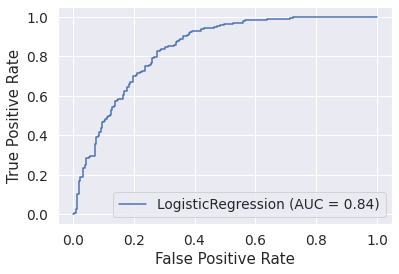

In [387]:
plot_roc_curve(logreg_down,X_test_down,y_test_down)

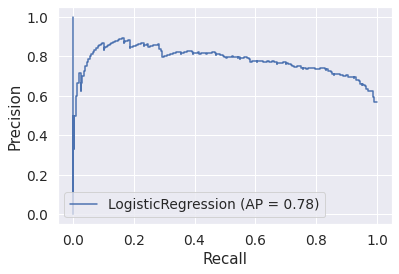

In [388]:
plot_precision_recall_curve(logreg_down,X_test_down,y_test_down)


# Application of DOWN-SAMPLING technique with Decision Tree Classifier 😵

In [389]:
dectree_down=DecisionTreeClassifier()
dectree_down.fit(X_train_down, y_train_down)
dec_pred_down=dectree_down.predict(X_test_down)
print("Accuracy score of Decision Tree Classifier on DOWN-SAMPLING Data:",accuracy_score(y_test_down,dec_pred_down))
print(classification_report(y_test_down,dec_pred_down))
print("roc auc score of Decision Tree Classifier:",roc_auc_score(y_test_down,dec_pred_down))
confusion_matrix(y_test_down,dec_pred_down)

Accuracy score of Decision Tree Classifier on DOWN-SAMPLING Data: 0.6955445544554455
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       207
           1       0.69      0.69      0.69       197

    accuracy                           0.70       404
   macro avg       0.70      0.70      0.70       404
weighted avg       0.70      0.70      0.70       404

roc auc score of Decision Tree Classifier: 0.695419210868339


array([[145,  62],
       [ 61, 136]])

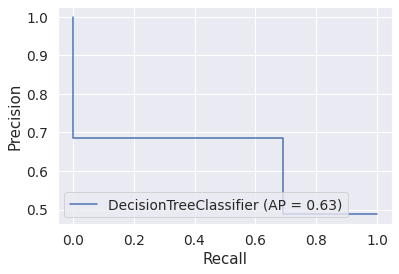

In [390]:
plot_precision_recall_curve(dectree_down, X_test_down,y_test_down)


# Application of SMOTE technique with Logistic Regression 👻

In [391]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(sampling_strategy='auto', k_neighbors=6, random_state=42)
X_smt, y_smt = oversample.fit_resample(X, y)

X_train_smt,X_test_smt,y_train_smt,y_test_smt=train_test_split(X_smt,y_smt,test_size=0.3,random_state=42)
X_train_smt=scaler.fit_transform(X_train_smt)
X_test_smt=scaler.transform(X_test_smt)

logreg_smote=LogisticRegression()
logreg_smote.fit(X_train_smt,y_train_smt)
logreg_smt_pred=logreg_smote.predict(X_test_smt)
print("Accuracy score of Logistic Regression on SMOTE technique:",accuracy_score(y_test_smt,logreg_smt_pred))
print(classification_report(y_test_smt,logreg_smt_pred))
confusion_matrix(y_test_smt,logreg_smt_pred)

Accuracy score of Logistic Regression on SMOTE technique: 0.8029185867895545
              precision    recall  f1-score   support

           0       0.84      0.76      0.79     16396
           1       0.77      0.85      0.81     16154

    accuracy                           0.80     32550
   macro avg       0.81      0.80      0.80     32550
weighted avg       0.81      0.80      0.80     32550



array([[12402,  3994],
       [ 2421, 13733]])

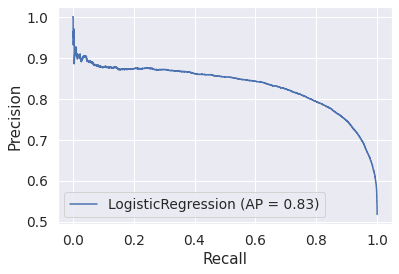

In [392]:
plot_precision_recall_curve(logreg_smote, X_test_smt,y_test_smt)


# Application of SMOTE technique with Logistic Regression 😍😍

In [397]:
dectree_smote=DecisionTreeClassifier()
dectree_smote.fit(X_train_smt, y_train_smt)
dec_pred_sm=dectree_smote.predict(X_test_smt)
print("Accuracy score of Decision Tree Classifier on SMOTE technique:",accuracy_score(y_test_smt,dec_pred_sm))
print(classification_report(y_test_smt,dec_pred_sm))
print("roc auc score of Decision Tree Classifier:",roc_auc_score(y_test_smt,dec_pred_sm))
confusion_matrix(y_test_smt,dec_pred_sm)

Accuracy score of Decision Tree Classifier on SMOTE technique: 0.9627649769585254
              precision    recall  f1-score   support

           0       0.98      0.95      0.96     16396
           1       0.95      0.98      0.96     16154

    accuracy                           0.96     32550
   macro avg       0.96      0.96      0.96     32550
weighted avg       0.96      0.96      0.96     32550

roc auc score of Decision Tree Classifier: 0.962863424233144


array([[15570,   826],
       [  386, 15768]])

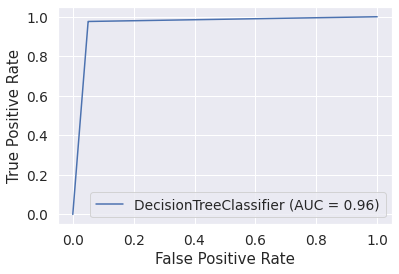

In [398]:
plot_roc_curve(dectree_smote,X_test_smt,y_test_smt)


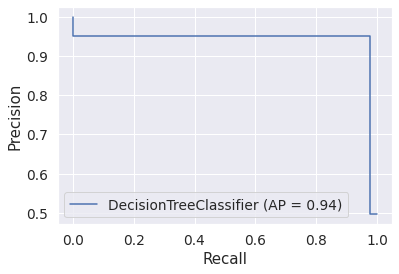

In [399]:
plot_precision_recall_curve(dectree_smote, X_test_smt,y_test_smt)


# Dumping the model and predicting the test set. ☠️

In [400]:
import pickle 
pickle_out = open("dectree_smote.pkl","wb")
pickle.dump(dectree_smote,pickle_out)
pickle_out.close()

In [401]:
test_df['V18'] = test_df['V18'].fillna(0)

In [402]:
test_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,4,V15,V16,V17,V18
0,1,10024,1,1,4,2500.0,B014,1,1,S133,6,0.0,36000,4,19.00,934,32,0.0
1,0,10004,1,1,4,800.0,B022,0,0,S133,6,0.0,39000,4,19.20,1090,33,0.0
2,1,10001,1,1,4,2050.0,B043,1,1,S133,3,0.0,24000,4,16.75,853,43,0.0
3,0,10005,1,1,3,1600.0,B001,1,1,S133,6,0.0,37000,4,18.50,950,46,0.0
4,1,10001,1,2,4,1800.0,B001,1,1,S143,6,0.0,40000,4,19.20,1090,38,0.0


In [419]:
scaler = MinMaxScaler()
test_df['V17'] = scaler.fit_transform(test_df[['V17']])

In [420]:
labelDict1 = {}
for feature1 in test_df:
    le1 = preprocessing.LabelEncoder()
    le1.fit(test_df[feature1])
    le_name_mapping1 = dict(zip(le1.classes_, le1.transform(le1.classes_)))
    test_df[feature1] = le1.transform(test_df[feature1])
    # Get labels
    labelKey1 = 'label_' + feature1
    labelValue1 = [*le_name_mapping1]
    labelDict1[labelKey1] =labelValue1
    
for key1, value1 in labelDict1.items():     
    print(key1, value1)

label_V1 [0, 1]
label_V2 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,

In [421]:
prediction = dectree_smote.predict(test_df)


In [422]:
prediction


array([0, 1, 0, ..., 0, 0, 0])

In [423]:
df = pd.DataFrame (prediction)

## save to xlsx file

filepath = 'New Microsoft Excel Worksheet.xlsx'

df.to_excel(filepath, index=False)

In [ ]:
!jupyter nbconvert --to pdf /kaggle/input/iimsurveyy/iimsurveyapp.ipynb--output␣
,!/kaggle/working/outputv1.pdf